In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

FILE = 'data/dataset.csv'
df = pd.read_csv(FILE,sep=',')
Inputs = df['Inputs']
Directions = df['Directions'].values
Energy = df['Energy'].values
df.head()

,Inputs,Directions,Energy
0,HHHHP,SRRRL,1
1,HHHHP,SRRRF,1
2,HHHHP,SRLLR,1
3,HHHHP,SRLLF,1
4,HHHHP,SLRRL,1


In [2]:
dic = {}
for i,input in enumerate(Inputs):
    try:
        dic[input].append([Directions[i],Energy[i]])
    except:
        dic[input] = [[Directions[i],Energy[i]]]

data = {}

for key in dic.keys():
    max_energy = 0
    for _,energy in dic[key]:
        if max_energy < energy: 
            max_energy = energy
    data[key] = {'energy':max_energy,'directions':[]}

values = []

for key in dic.keys():
    for dir,energy in dic[key]:
        if energy == data[key]['energy']:
            data[key]['directions'].append(dir)
            values.append([key,dir])

In [3]:
vals = pd.DataFrame(values,columns=['Inputs','Directions'])
vals.head()

,Inputs,Directions
0,HHHHP,SRRRL
1,HHHHP,SRRRF
2,HHHHP,SRLLR
3,HHHHP,SRLLF
4,HHHHP,SLRRL


In [4]:
def make_tuples_v2(line):
    res = [(line['Inputs'][0],line['Inputs'][1],str(0),line['Directions'][1])]
    for i,input in enumerate(line['Inputs'][1:-1]):
        res.append((line['Inputs'][i+1],line['Inputs'][i+2],str(i+1),line['Directions'][i+2]))
    return res

def make_tuples(line):
    res = [('_',line['Inputs'][0],line['Inputs'][1],line['Directions'][1])]
    for i,input in enumerate(line['Inputs'][1:-1]):
        res.append((line['Inputs'][i],input,line['Inputs'][i+2],line['Directions'][i+2]))
    return res

combinations = vals.apply(make_tuples,axis=1)
combinations[0]

combinations_v2 = vals.apply(make_tuples_v2,axis=1)
combinations_v2[0]


[('H', 'H', '0', 'R'),
 ('H', 'H', '1', 'R'),
 ('H', 'H', '2', 'R'),
 ('H', 'P', '3', 'L')]

In [5]:
def tuple2string(t):
    s = ''
    for v in t:
        s += v
    return s

INSTRUCTIONS = []
for c in combinations.apply(lambda x: [tuple2string(v) for v in x]):
    INSTRUCTIONS += c

combinations_v2 = combinations_v2.apply(lambda x: [tuple2string(v) for v in x])
combinations_v2 = combinations_v2.values.tolist()

values = []
for v in combinations_v2:
  values += v

#values

In [167]:
data_hist = {}
INSTRUCTIONS.sort()
for inst in INSTRUCTIONS:
    try:
        data_hist[inst] += 1
    except:
        data_hist[inst] = 1
DATA_HIST = pd.DataFrame(list(zip(list(data_hist.keys()),list(data_hist.values()))),columns=['Case','Counts'])
DATA_HIST.head()

,Case,Counts
0,HHHF,5346
1,HHHL,9549
2,HHHR,9549
3,HHPF,7584
4,HHPL,7200


In [168]:
dic_cases = {}
for i,case in enumerate(DATA_HIST['Case'].values):
    try:
        dic_cases[case[:-1]]['N'] += DATA_HIST['Counts'].values[i]
    except:
        dic_cases[case[:-1]] = {'N':DATA_HIST['Counts'].values[i]}

for key in dic_cases.keys():
    for l in 'LRF':
        try:
            dic_cases[key][l] = DATA_HIST['Counts'].loc[DATA_HIST['Case'] == key+l].values[0]/dic_cases[key]['N']
        except:
            dic_cases[key][l] = 0
    dic_cases[key].pop('N')

,HHH,HHP,HPH,HPP,PHH,PHP,PPH,PPP,_HH,_HP,_PH,_PP
L,0.390648,0.327511,0.5,0.370362,0.327511,0.250344,0.370362,0.325438,0.333333,0.333333,0.333333,0.333333
R,0.390648,0.327511,0.5,0.370362,0.327511,0.250344,0.370362,0.325438,0.333333,0.333333,0.333333,0.333333
F,0.218704,0.344978,0.0,0.259275,0.344978,0.499312,0.259275,0.349125,0.333333,0.333333,0.333333,0.333333


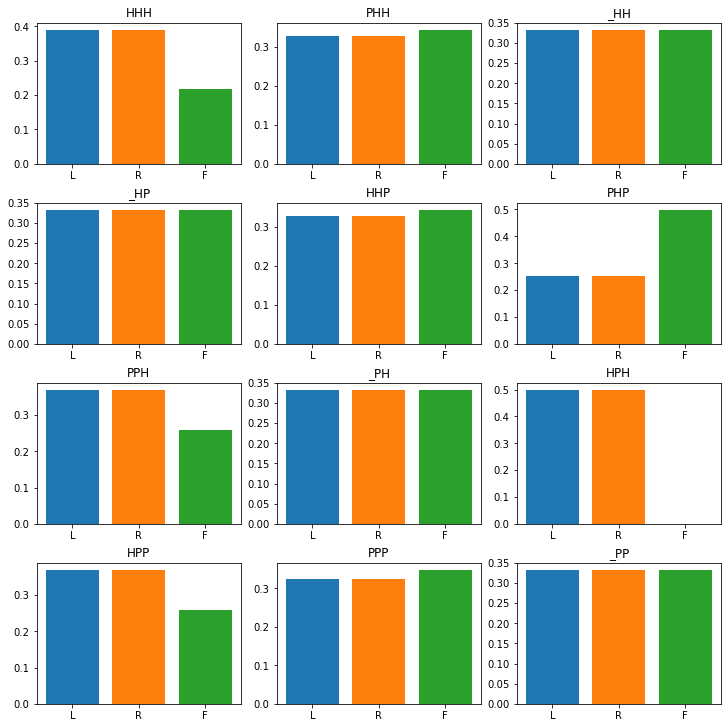

In [169]:
CASES = pd.DataFrame.from_dict(dic_cases)
fig,ax = plt.subplots(4,3,figsize=(10,10),constrained_layout=True)
for i,col in enumerate(CASES.columns):
    ax[i%4,i%3].set_title(f'{col}')
    for j,row in enumerate(CASES[col]):
        ax[i%4,i%3].bar(j,row)
    ax[i%4,i%3].set_xticks([0,1,2])
    ax[i%4,i%3].set_xticklabels(['L','R','F'])
#CASES.to_pickle('probs.pkl')
CASES
    

In [8]:
def lists_by_positions(values):
    list_0 = []
    list_1 = []
    list_2 = []
    list_3 = []
    list_4 = []
    list_5 = []
    list_6 = []
    for i in values:
        v = i[2]
        a = i[:2]+i[3]
        if (v == "0"):
            list_0.append(a)
        if (v == "1"):
            list_1.append(a)
        if (v == "2"):
            list_2.append(a)
        if (v == "3"):
            list_3.append(a)
        if (v == "4"):
            list_4.append(a) 
        if (v == "5"):
            list_5.append(a)  
        if (v == "6"):
            list_6.append(a)
    return[list_0,list_1,list_2,list_3,list_4,list_5,list_6]
    

data2 = lists_by_positions(values)

In [47]:
def get_probabilities(l):
    cases = {'HH':{'N':0,'L':0,'R':0,'F':0},'HP':{'N':0,'L':0,'R':0,'F':0},'PH':{'N':0,'L':0,'R':0,'F':0},'PP':{'N':0,'L':0,'R':0,'F':0}}
    for value in l:
        cases[value[:-1]]['N'] += 1
        cases[value[:-1]][value[-1]] += 1
    
    for case in cases.keys():
        for d in 'LRF':
            cases[case][d] /= cases[case]['N']
        cases[case].pop('N')
    CASES = pd.DataFrame.from_dict(cases)
    return CASES
    
def plot_hists(df):
    fig,ax = plt.subplots(2,2,figsize=(8,8),constrained_layout=True)
    pares = [(0,0),(1,0),(0,1),(1,1)]
    for i,col in enumerate(df.columns):
        a,b = pares[i]
        ax[a,b].set_title(f'{col}')
        for j,row in enumerate(df[col]):
            ax[a,b].bar(j,row)
        ax[a,b].set_xticks([0,1,2])
        ax[a,b].set_xticklabels(['L','R','F'])

Altura: 0


,HH,HP,PH,PP
L,0.333333,0.333333,0.333333,0.333333
R,0.333333,0.333333,0.333333,0.333333
F,0.333333,0.333333,0.333333,0.333333


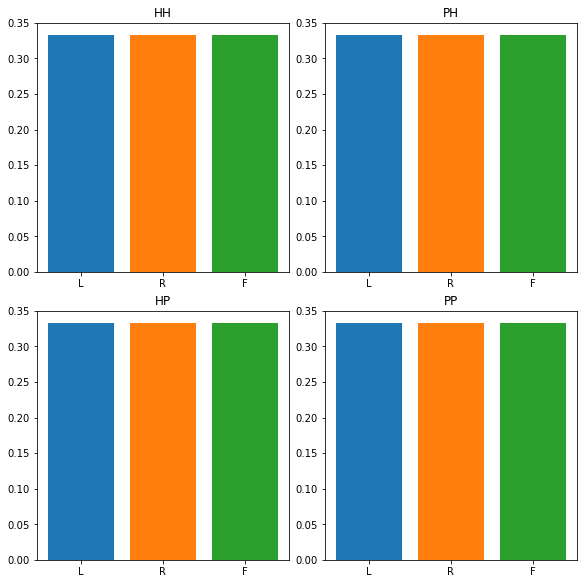

Altura: 1


,HH,HP,PH,PP
L,0.338736,0.327880,0.384226,0.351562
R,0.338736,0.327880,0.384226,0.351562
F,0.322528,0.344241,0.231547,0.296875


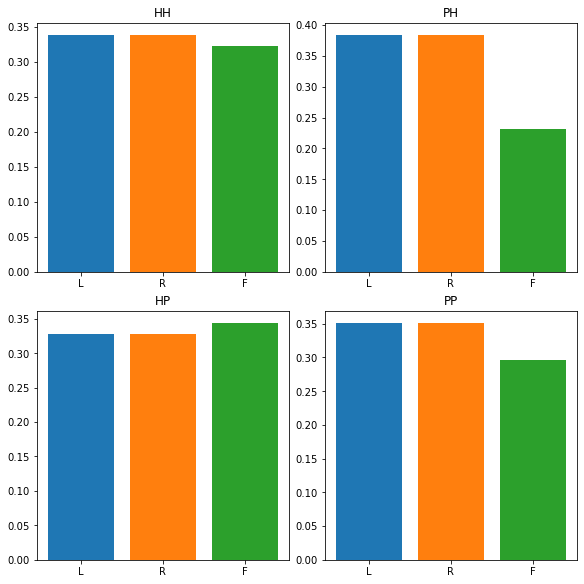

Altura: 2


,HH,HP,PH,PP
L,0.381710,0.312325,0.419145,0.378846
R,0.381710,0.312325,0.419145,0.378846
F,0.236581,0.375350,0.161710,0.242308


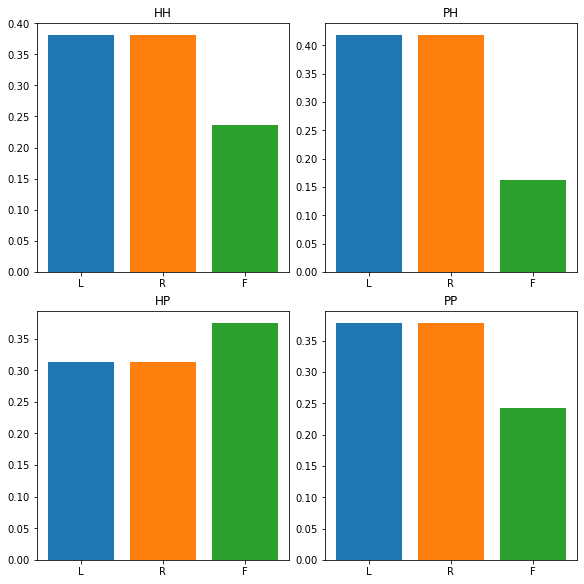

Altura: 3


,HH,HP,PH,PP
L,0.347090,0.278579,0.452467,0.388337
R,0.347090,0.278579,0.452467,0.388337
F,0.305819,0.442841,0.095066,0.223325


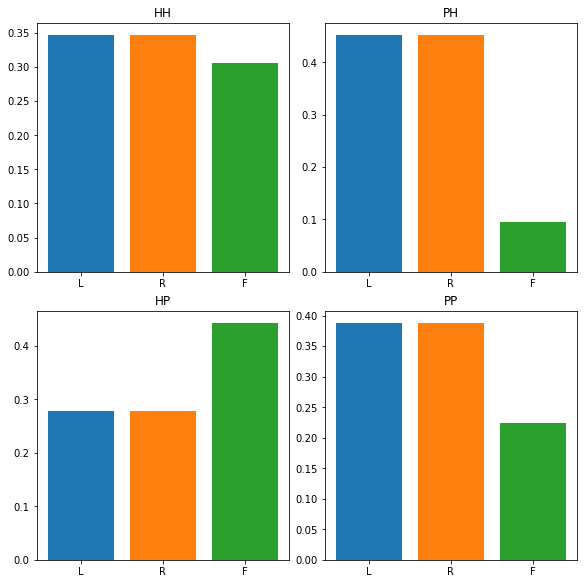

Altura: 4


,HH,HP,PH,PP
L,0.35913,0.297260,0.474734,0.367216
R,0.35913,0.297260,0.474734,0.367216
F,0.28174,0.405479,0.050532,0.265568


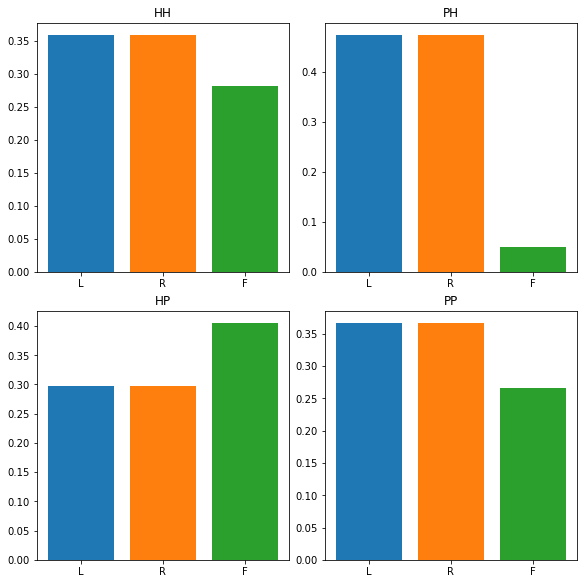

Altura: 5


,HH,HP,PH,PP
L,0.375108,0.322563,0.468845,0.333516
R,0.375108,0.322563,0.468845,0.333516
F,0.249784,0.354874,0.062310,0.332968


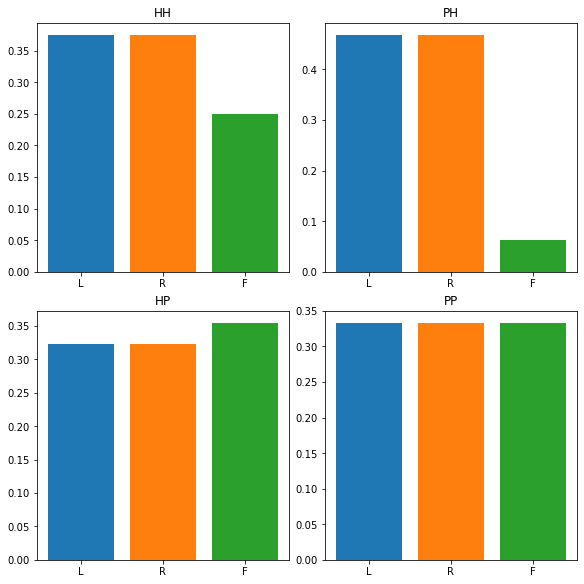

Altura: 6


,HH,HP,PH,PP
L,0.366356,0.300274,0.463087,0.323356
R,0.366356,0.300274,0.463087,0.323356
F,0.267287,0.399453,0.073826,0.353288


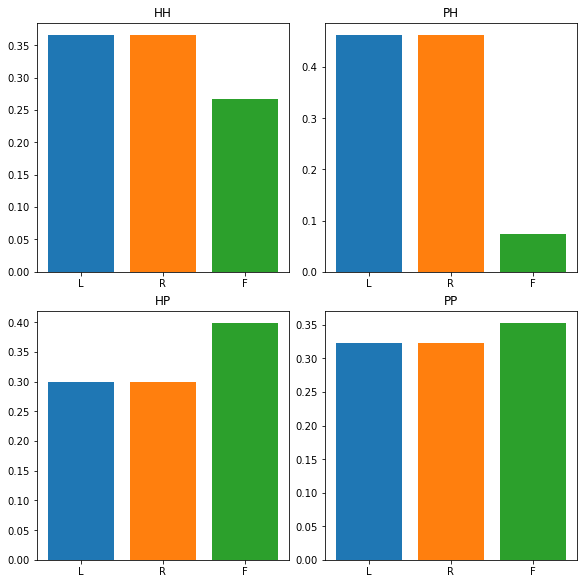

In [120]:
desicion_tree = []
for i,d in enumerate(data2):
    print(f'Altura: {i}')
    df = get_probabilities(d)
    desicion_tree.append(df)
    display(df)
    df.to_pickle(f'models/decision_tree/altura{i}.pkl')
    plot_hists(df)
    plt.show()

In [55]:
cases = {'HH':{'L':[],'R':[],'F':[]},'HP':{'L':[],'R':[],'F':[]},'PH':{'L':[],'R':[],'F':[]},'PP':{'L':[],'R':[],'F':[]}}
directions = 'LRF'
for df in desicion_tree:
    for i,col in enumerate(df.columns):
        for j,row in enumerate(df[col]):
            cases[col][directions[j]].append(row)

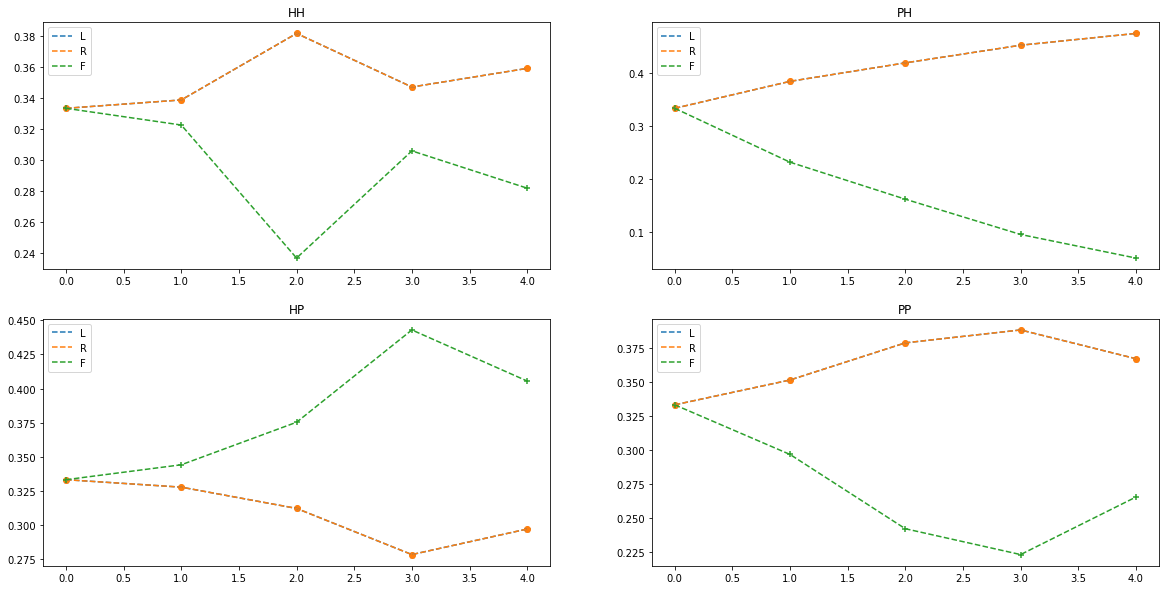

In [74]:
fig,ax = plt.subplots(2,2,figsize=(20,10))
pares = [(0,0),(1,0),(0,1),(1,1)]
m = '*o+'
for i,case in enumerate(cases.keys()):
    a,b = pares[i]
    ax[a,b].set_title(case)
    for j,d in enumerate(directions):
        ax[a,b].plot(range(5),cases[case][d][:5],ls='--',label=d)
        ax[a,b].scatter(range(5),cases[case][d][:5],marker=m[j])
    ax[a,b].legend()

In [75]:
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions

In [121]:
def calc_functions(x,y):
    negloglik = lambda y, rv_y: -rv_y.log_prob(y)
    model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tfp.layers.DistributionLambda(lambda t: tfd.Normal(loc=t, scale=1)),
    ])

    model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.01), loss=negloglik)
    model.fit(x, y, epochs=1000, verbose=False)
    return model

,w,b
0,0.006034046,0.33990815


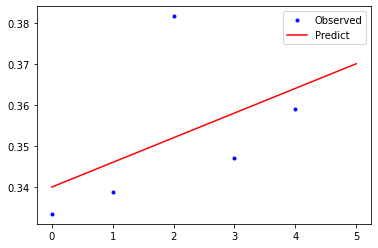

,w,b
0,-0.012144539,0.33416447


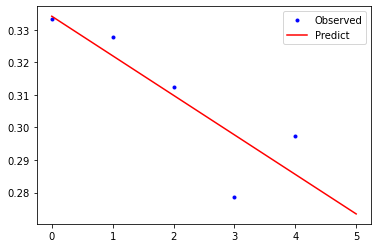

,w,b
0,0.03724804,0.3369921


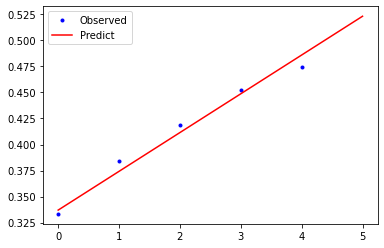

,w,b
0,0.018865962,0.32103884


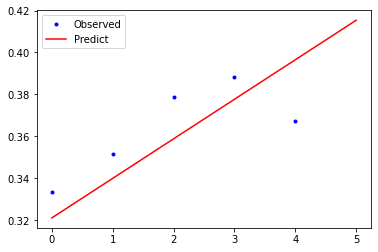

In [127]:
for case in cases.keys():
    x = np.arange(5)
    y = np.array(cases[case]['L'][:5])
    b = 0
    while b < 0.28 or b > 0.34:
        model = calc_functions(x,y)
        w = np.squeeze(model.layers[-2].kernel.numpy())
        b = np.squeeze(model.layers[-2].bias.numpy())
    df = pd.DataFrame([[w,b]],columns=['w','b'])
    display(df)
    df.to_pickle(f'models/decision_tree/{case}.pkl')
    x_tst = np.arange(0,6,dtype= np.float64)
    x_tst = x_tst.reshape((len(x_tst),1))
    yhat = model(x_tst)
    plt.plot(x,y,'b.',label='Observed')
    plt.plot(x_tst,yhat.mean(),label='Predict',color='red')
    plt.legend()
    plt.show()